<h2>AI/ML Course - Week 4</h2>

<p>Mariano Salcedo - mariano.salcedo@nokia.com</p>

In [1]:
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

#%matplotlib inline

## Exercise 01 - Boston Housing Dataset


In [2]:
path =r'C:\python_sqm\data\raw\AI-ML_Nokia\boston houses'
filenames = glob.glob(path + "/*.csv")

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=r"\s+", names=column_names))

# Concatenate all data into one DataFrame
houses = pd.concat(dfs, ignore_index=True)

In [3]:
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's

In [4]:
houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
count = houses.isna().sum()
count

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

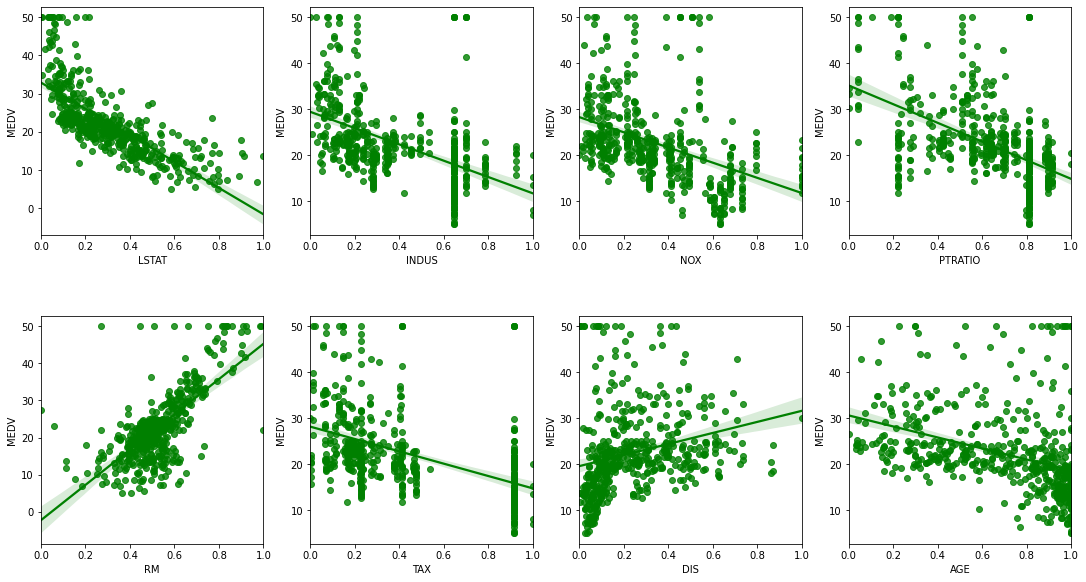

In [6]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = houses.loc[:,column_sels]
y = houses['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color='green')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

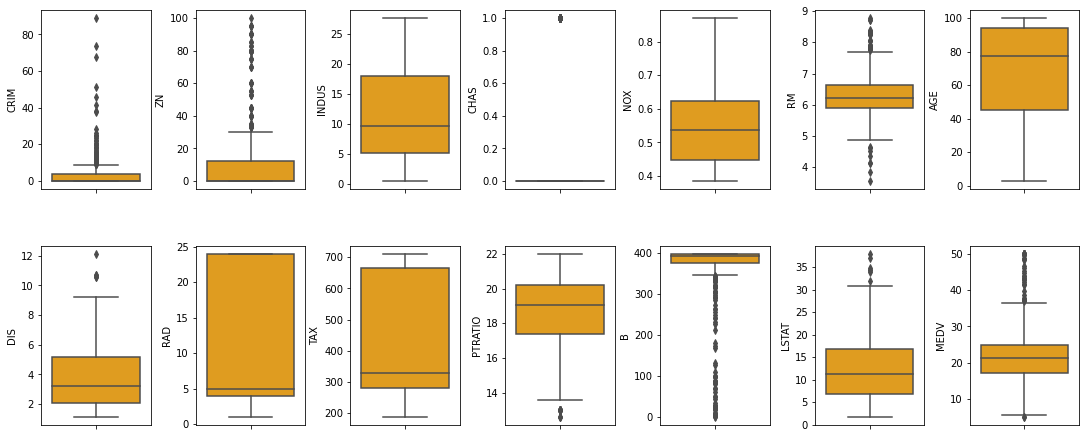

In [7]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in houses.items():
    sns.boxplot(y=k, data=houses, ax=axs[index], color='orange')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We see from the 2 previous plots that some features have outliers. Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions


In [8]:
houses = houses[~(houses['MEDV'] >= 50.0)]
print(np.shape(houses))

(490, 14)


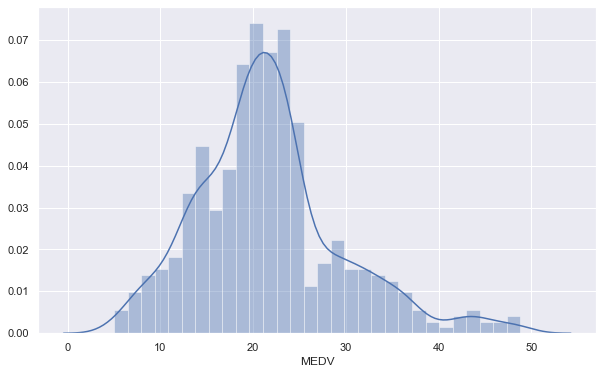

In [9]:
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(houses['MEDV'], bins=30)
plt.show()

Let's now draw a correlation matrix to see how th different variables correlate with each other.


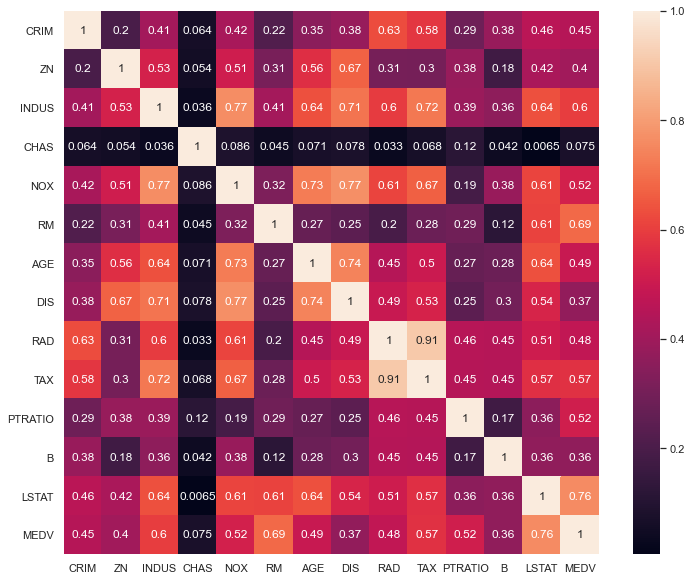

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(houses.corr().abs(),  annot=True)

Seems that the features that best explain MEDV are LSTAT and RM. Let's verify this by using some ML algorithms

## Linear Regression

In [11]:
X = houses.drop(columns='MEDV')
y = houses['MEDV']
print(X.shape, y.shape)

(490, 13) (490,)


Let's split the data into train and test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
predictions = lm.predict(X_test)
predictions[:5]

array([19.5122194 ,  7.11151233, 26.93804952, 19.71263627, 14.17403259])

So we have calculated a regression polynomial. Follow the coefficient of this polynomy for each variable

In [15]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.118299
ZN,0.029615
INDUS,-0.067241
CHAS,0.116043
NOX,-11.081605
RM,3.457185
AGE,-0.028549
DIS,-1.324301
RAD,0.263727
TAX,-0.013483


Look that with this regression algorithm, the variable NOX gets a high relative weight, although by looking it at the scatter plot that we previously created we can see that its variance is too high, so probably other regression algorithms will give it a lower weight.</br>
Let's now plot the Y-test (real value) and Y-predicted values

Text(0, 0.5, 'Predicted Y')

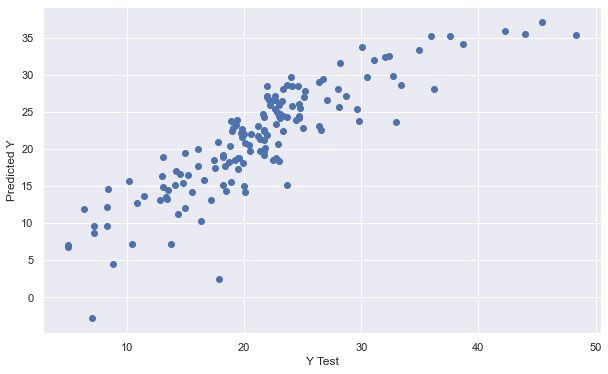

In [16]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Follows the different error measures for this regression

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Linear regression:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions).round(2))
print('MSE:', metrics.mean_squared_error(y_test, predictions).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(2))
print('r2:', metrics.r2_score(y_test, predictions).round(2))


MAE: 2.94
MSE: 14.8
RMSE: 3.85
r2: 0.75


## KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor
import random
from sklearn.model_selection import GridSearchCV, KFold

#Set seed for reproducability
seed = 0
random.seed(0)
np.random.seed(0)

n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
leaf_size=[int(x) for x in np.linspace(start = 2, stop = 60, num = 30)]


knn_parameters = {'weights': ['uniform', 'distance'],
                'n_neighbors':n_neighbors,
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': leaf_size,
                'p': [1,2]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_KNN = GridSearchCV(KNeighborsRegressor(), 
                      param_grid=knn_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

KNN_out=gs_KNN.fit(X_train, y_train)
KNN_out

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                       44, 46, 48, 50, 52, 54, 56, 58, 60],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [19]:
cf = KNN_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('KNN Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_KNN.best_params_

KNN Results:
MAE: 3.16
MSE: 18.74
RMSE: 4.33
r2: 0.68




{'algorithm': 'auto',
 'leaf_size': 2,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

Text(0, 0.5, 'Predicted Y')

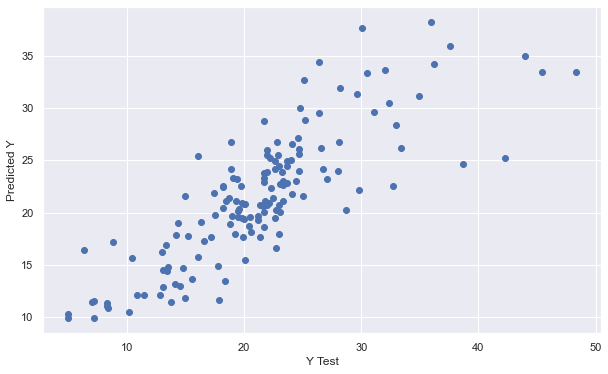

In [20]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## SVM

In [21]:
from sklearn.svm import SVR
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

SVR_parameters = {'kernel': ['linear', 'poly', 'rbf'],
                 'gamma': ['scale', 'auto'],
                 'cache_size': [700]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_SVR = GridSearchCV(SVR(), 
                      param_grid=SVR_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

SVR_out=gs_SVR.fit(X_train, y_train)
SVR_out


GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid={'cache_size': [700], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [22]:
cf = SVR_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('SVR Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_SVR.best_params_

SVR Results:
MAE: 2.83
MSE: 14.18
RMSE: 3.77
r2: 0.76




{'cache_size': 700, 'gamma': 'scale', 'kernel': 'linear'}

Text(0, 0.5, 'Predicted Y')

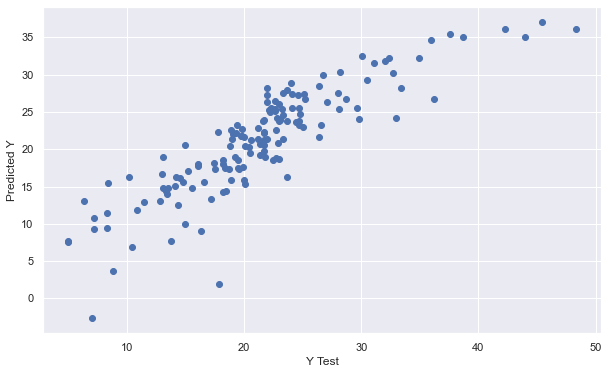

In [23]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Number of trees in random forest
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
max_depth=[int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_leaf=[int(x) for x in np.linspace(start = 2, stop = 100, num = 50)]
max_leaf_nodes=[int(x) for x in np.linspace(start = 5, stop = 100, num = 20)]

DT_parameters = {'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'min_samples_split': min_samples_split,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_DT = GridSearchCV(DecisionTreeRegressor(), 
                      param_grid=DT_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

DT_out=gs_DT.fit(X_train, y_train)
DT_out


GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                            50, 55, 60, 65, 70, 75, 80, 85, 90,
                                            95, 100],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22, 24, 26, 28, 30, 32, 34,
                                              36, 38, 40, 42, 44, 46, 48, 50,
                                              52, 54, 56, 58, 60, ...],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'splitter': ['best', 'random']})

In [25]:
cf = DT_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('SVR Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_DT.best_params_

SVR Results:
MAE: 3.07
MSE: 16.34
RMSE: 4.04
r2: 0.77




{'criterion': 'mse',
 'max_depth': 10,
 'max_leaf_nodes': 85,
 'min_samples_leaf': 4,
 'min_samples_split': 18,
 'splitter': 'random'}

Text(0, 0.5, 'Predicted Y')

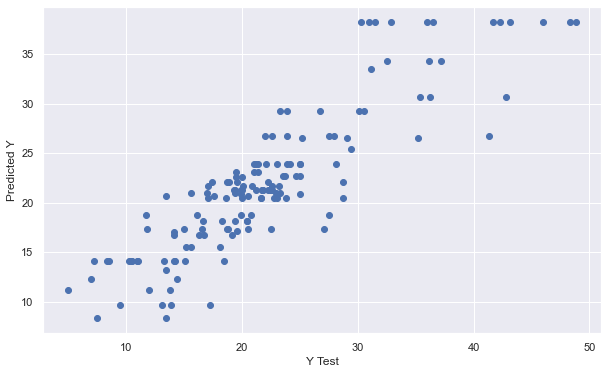

In [26]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [80, 100, 150, 200]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
#max_depth=[int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
max_depth=[2,3,4,5,6,7,8,9]
#min_samples_leaf=[int(x) for x in np.linspace(start = 2, stop = 100, num = 50)]
#max_leaf_nodes=[int(x) for x in np.linspace(start = 5, stop = 100, num = 20)]

RF_parameters = {'n_estimators': n_estimators,
                'criterion': ['mse', 'mae'],
                'max_depth': max_depth,
                'min_samples_split': min_samples_split}
               # 'min_samples_leaf': min_samples_leaf,
               # 'max_leaf_nodes': max_leaf_nodes}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_RF = GridSearchCV(RandomForestRegressor(), 
                      param_grid=RF_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

RF_out=gs_RF.fit(X_train, y_train)
RF_out



GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'n_estimators': [80, 100, 150, 200]})

In [45]:
cf = RF_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Random Forest Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_RF.best_params_

Random Forest Results:
MAE: 2.32
MSE: 10.01
RMSE: 3.16
r2: 0.86




{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_split': 6,
 'n_estimators': 150}

Text(0, 0.5, 'Predicted Y')

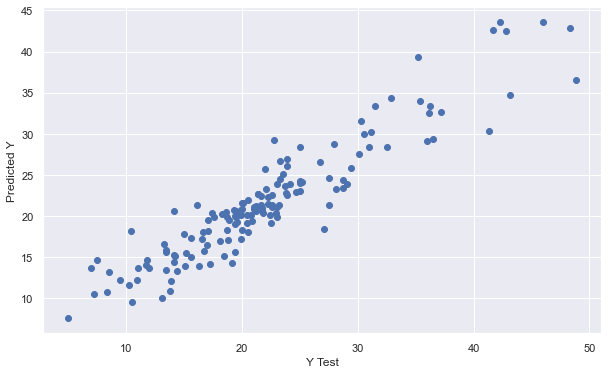

In [46]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

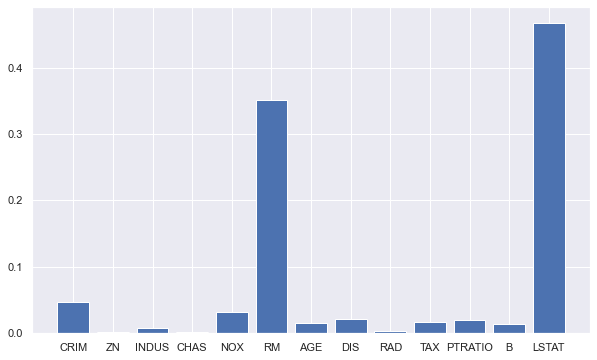

In [88]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
pyplot.bar(X.columns, importance)
pyplot.show()

## XGBost

In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

XGB_parameters = {'booster': ['gbtree', 'gblinear'],
              'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, .05, .07],
              'max_depth':range(3,10,2),
              'min_child_weight':range(1,6,2),
              'gamma': [0.0, 0.1, 0.2],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


cv_method = KFold(n_splits=10, shuffle=True, random_state=seed)

gs_XGB = GridSearchCV(XGBRegressor(), 
                      param_grid=XGB_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

XGB_out=gs_XGB.fit(X_train, y_train)
XGB_out


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'colsample_

In [48]:
cf = XGB_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Random Forest Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_XGB.best_params_

Random Forest Results:
MAE: 1.89
MSE: 7.19
RMSE: 2.68
r2: 0.9




{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

Text(0, 0.5, 'Predicted Y')

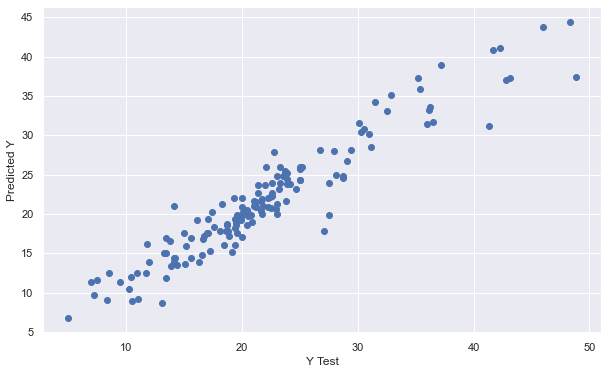

In [49]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [89]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
print(model.feature_importances_)


[0.01792514 0.0079738  0.01619939 0.01798937 0.06801677 0.22926429
 0.01212057 0.03039782 0.00945271 0.03723244 0.151598   0.01169104
 0.3901387 ]


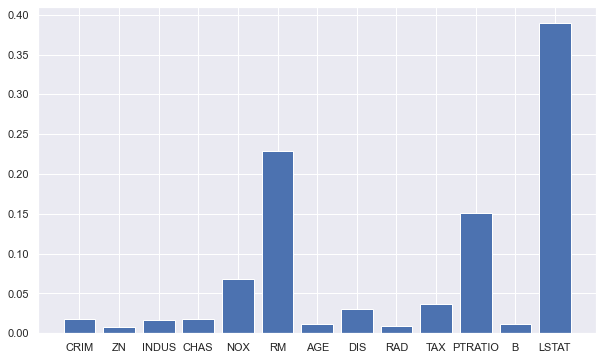

In [91]:
importance = model.feature_importances_
pyplot.bar(X.columns, importance)
pyplot.show()

Therefore best accuracy is get by using XGBost (r2=0.9) followed by Random Forest (r2=0.86). According to this 2 algorithms, the most impostant features are:</br>
- Random Forest: LSTAT and RM
- XGBost: LSTAT, RM and PTRATIO 

## Exercise 02 - Ames Housing Dataset


In [2]:
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

path =r'C:\python_sqm\data\raw\AI-ML_Nokia\arnes houses'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, delimiter=","))

# Concatenate all data into one DataFrame
houses2 = pd.concat(dfs, ignore_index=True)

In [3]:
houses2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses2.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
nan=houses2.isna().sum().sort_values(ascending = False)
nan.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

So based on this we will drop the columns that have more than 100 NaN values. After that, we will drop every row having a NaN value

In [6]:
houses2=houses2.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'])

In [7]:
houses2=houses2.dropna()

In [8]:
houses2.isna().sum().sort_values(ascending = False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 75, dtype: int64

## Univariate analysis
The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [9]:
houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

In [10]:
objFeatures = houses2.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    houses2[feat] = le.fit_transform(houses2[feat].astype(str))
 

houses2.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500


In [11]:
# Let's remove the Ids as they are unique for each row and hence not useful for the model
houses2=houses2.drop(columns=['Id'])
houses2.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500


Ok now let's make some exploratory analisys: 

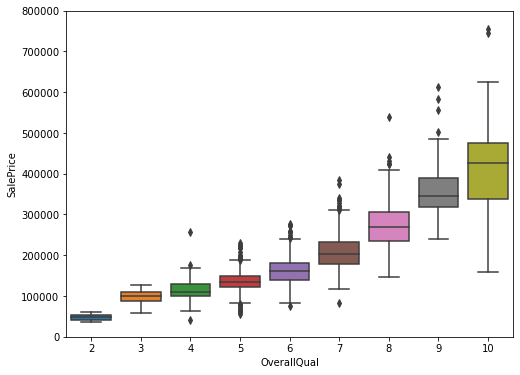

In [91]:
data = pd.concat([houses2['SalePrice'], houses2['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=houses2['OverallQual'], y="SalePrice", data=houses2)
fig.axis(ymin=0, ymax=800000);


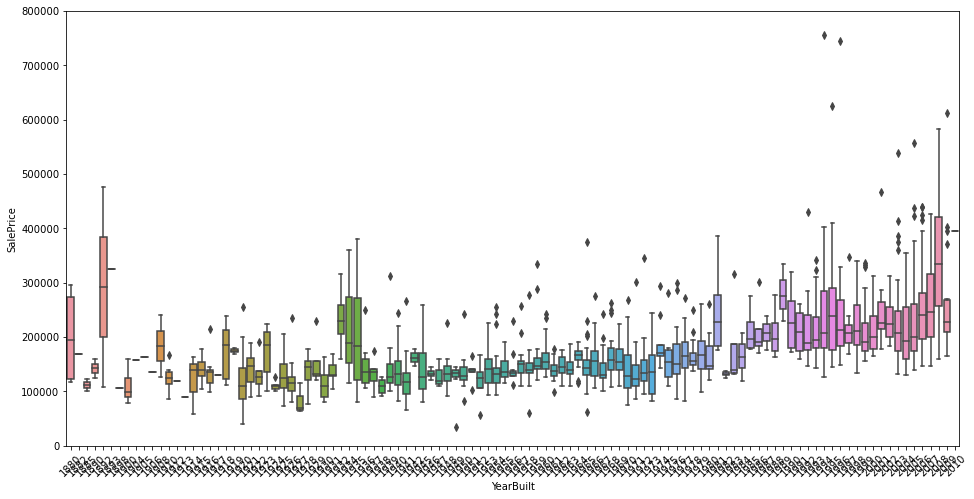

In [92]:
data = pd.concat([houses2['SalePrice'], houses2['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=houses2['YearBuilt'], y="SalePrice", data=houses2)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

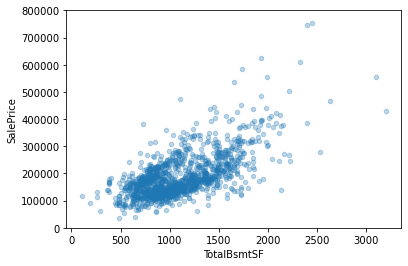

In [100]:
data = pd.concat([houses2['SalePrice'], houses2['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000));

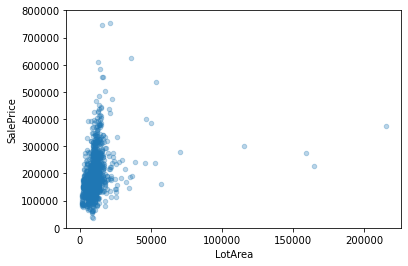

In [99]:
data = pd.concat([houses2['SalePrice'], houses2['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

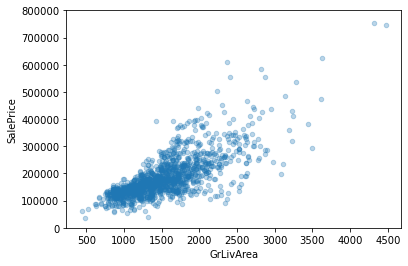

In [98]:
data = pd.concat([houses2['SalePrice'], houses2['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

In [12]:
houses2.drop(houses2[(houses2['OverallQual']<5) & (houses2['SalePrice']>200000)].index, inplace=True)
houses2.drop(houses2[(houses2['GrLivArea']>4500) & (houses2['SalePrice']<300000)].index, inplace=True)
houses2.reset_index(drop=True, inplace=True)

In [13]:
X = houses2.drop(columns='SalePrice')
y = houses2['SalePrice']
print(X.shape, y.shape)

(1335, 73) (1335,)


In [14]:
houses2.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500


In [15]:
#################################################################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_names = X.columns
for i in cols_names:
    le.fit(X[i])
    le.transform(X[i])
    X[i] = le.transform(X[i])

In [16]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,287,1,3,3,0,4,0,5,...,48,0,0,0,0,0,1,2,8,4
1,0,3,448,1,3,3,0,2,0,24,...,0,0,0,0,0,0,4,1,8,4
2,5,3,641,1,0,3,0,4,0,5,...,29,0,0,0,0,0,8,2,8,4
3,6,3,439,1,0,3,0,0,0,6,...,23,98,0,0,0,0,1,0,8,0
4,5,3,857,1,0,3,0,2,0,15,...,69,0,0,0,0,0,11,2,8,4


In [372]:
#################################################################
# StandardScaler
from sklearn.preprocessing import StandardScaler
ds = StandardScaler()
X = ds.fit_transform(X)
print(X)

[[ 0.22319287 -0.03836131 -0.60779009 ...  0.14570778  0.31512624
   0.18590329]
 [-1.00198179 -0.03836131 -0.03369237 ... -0.60533426  0.31512624
   0.18590329]
 [ 0.22319287 -0.03836131  0.65451173 ...  0.14570778  0.31512624
   0.18590329]
 ...
 [ 0.4682278  -0.03836131 -0.31182667 ...  1.64779187  0.31512624
   0.18590329]
 [-1.00198179 -0.03836131 -0.0087316  ...  1.64779187  0.31512624
   0.18590329]
 [-1.00198179 -0.03836131  0.08041401 ...  0.14570778  0.31512624
   0.18590329]]


In [17]:
objFeatures

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

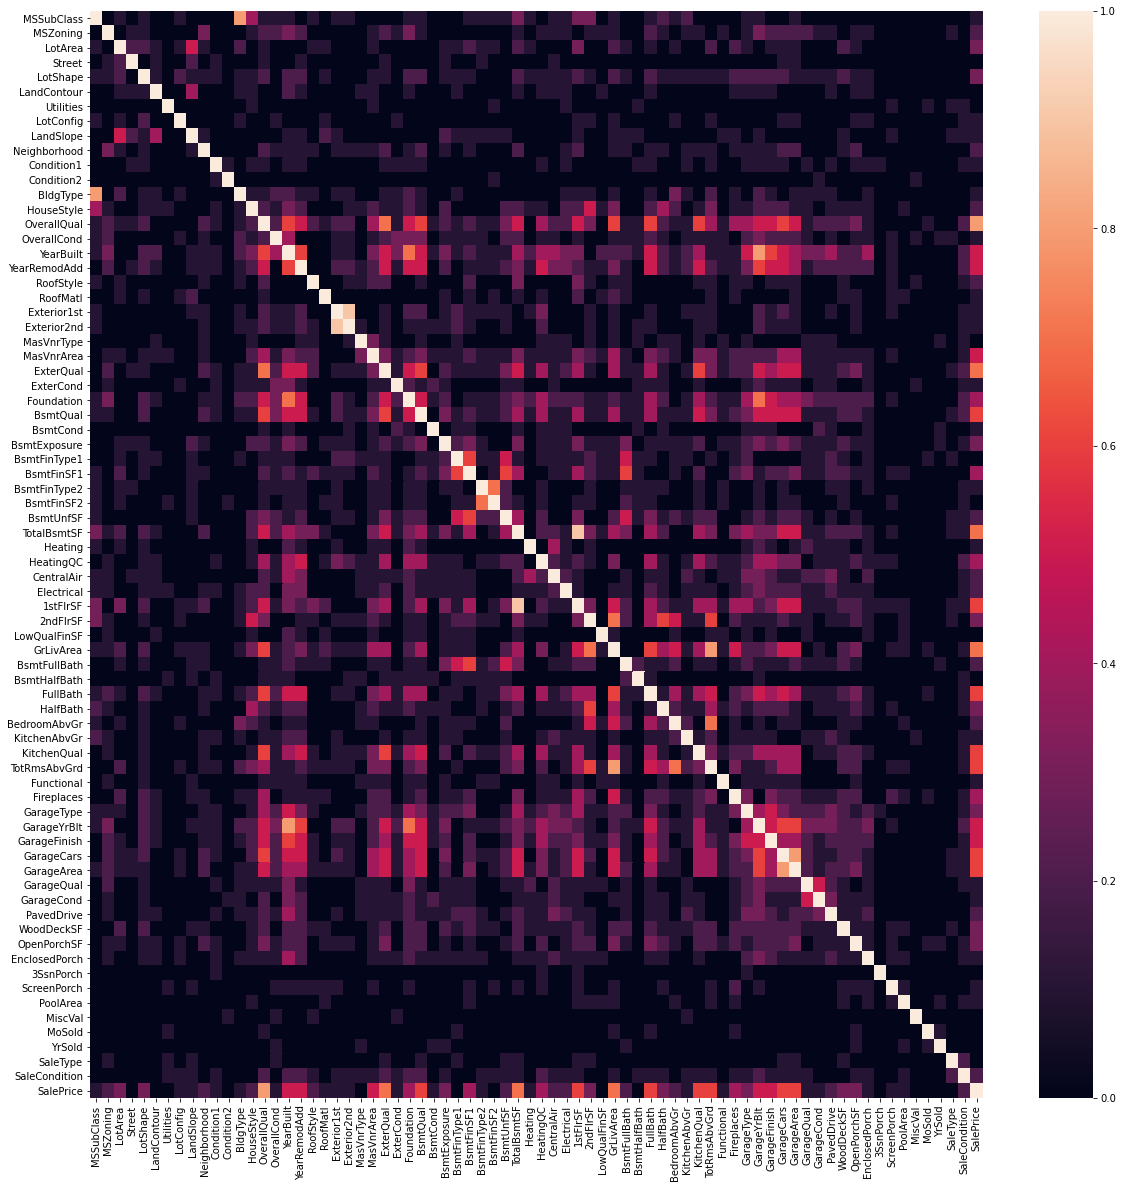

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(houses2.corr().abs().round(1),  annot=False)

In [19]:
X.shape, y.shape

((1335, 73), (1335,))

In [20]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,287,1,3,3,0,4,0,5,...,48,0,0,0,0,0,1,2,8,4
1,0,3,448,1,3,3,0,2,0,24,...,0,0,0,0,0,0,4,1,8,4
2,5,3,641,1,0,3,0,4,0,5,...,29,0,0,0,0,0,8,2,8,4
3,6,3,439,1,0,3,0,0,0,6,...,23,98,0,0,0,0,1,0,8,0
4,5,3,857,1,0,3,0,2,0,15,...,69,0,0,0,0,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,5,3,234,1,3,3,0,4,0,8,...,27,0,0,0,0,0,7,1,8,4
1331,0,3,801,1,3,3,0,4,0,14,...,0,0,0,0,0,0,1,4,8,4
1332,6,3,370,1,3,3,0,4,0,6,...,47,0,0,0,0,17,4,4,8,4
1333,0,3,455,1,3,3,0,4,0,12,...,0,35,0,0,0,0,3,4,8,4


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

As there are many variables, let's find the ones that has the most significance in price prediction by using some different algorithms. Then using the one that produces the best accuracy we will select the most significant features, resample the X dataframe and retrain the model.

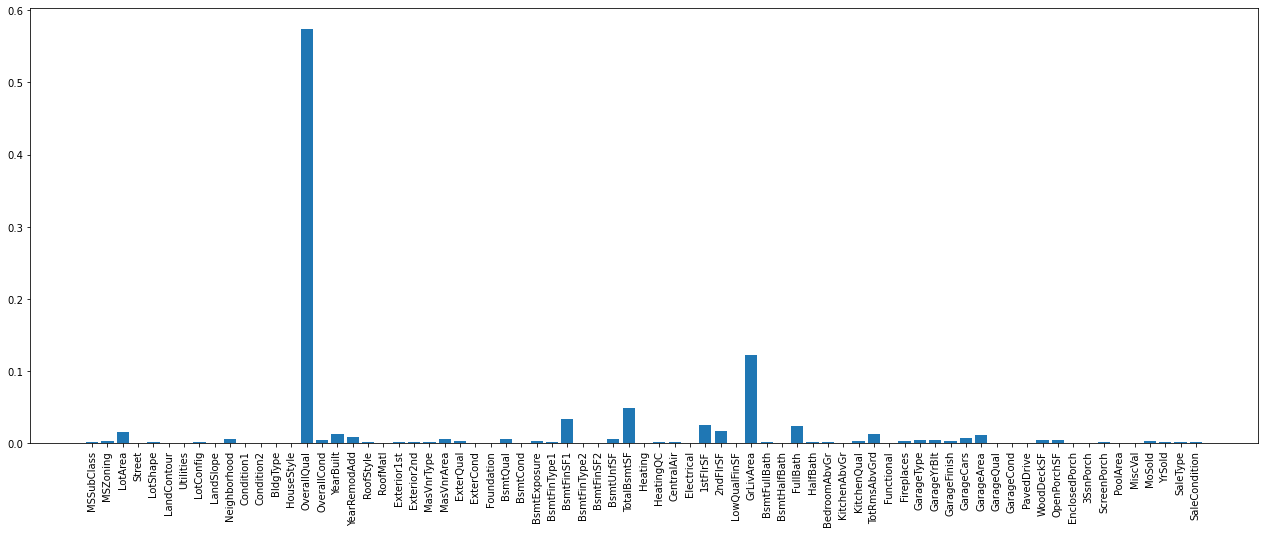

In [22]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
#importance=np.argsort(model.feature_importances_)[::-1]
pyplot.figure(figsize=(22,8))
pyplot.bar(X.columns, importance)
pyplot.xticks(X.columns, X.columns, rotation='vertical')
pyplot.show()

Therefore the most important features are:
    * OverallQual
    * TotalBsmtSF
    * GrLivArea
And then we cal also keep the following:
    * LotArea
    * YearBuilt
    * BsmtFnSF1
    * 1stFlrSF
    * FullBath
    * TotRmsAbvGrd
Let's now try the same test but using XGBoost algorithm

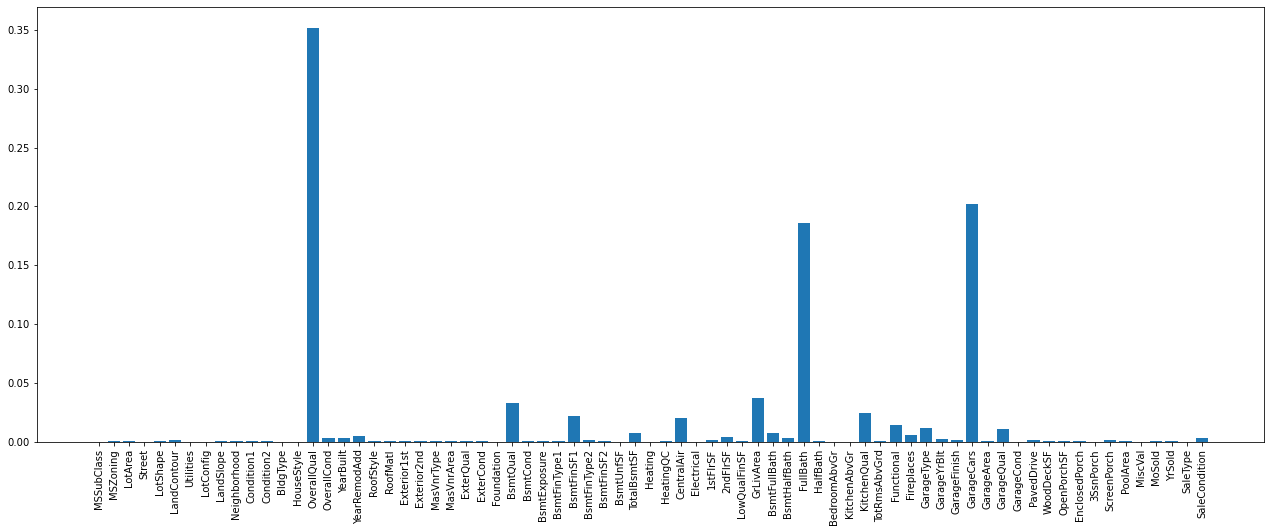

In [23]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

importance = model.feature_importances_
pyplot.figure(figsize=(22,8))
pyplot.bar(X.columns, importance)
pyplot.xticks(X.columns, X.columns, rotation='vertical')
pyplot.show()

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1335 non-null   int64
 1   MSZoning       1335 non-null   int64
 2   LotArea        1335 non-null   int64
 3   Street         1335 non-null   int64
 4   LotShape       1335 non-null   int64
 5   LandContour    1335 non-null   int64
 6   Utilities      1335 non-null   int64
 7   LotConfig      1335 non-null   int64
 8   LandSlope      1335 non-null   int64
 9   Neighborhood   1335 non-null   int64
 10  Condition1     1335 non-null   int64
 11  Condition2     1335 non-null   int64
 12  BldgType       1335 non-null   int64
 13  HouseStyle     1335 non-null   int64
 14  OverallQual    1335 non-null   int64
 15  OverallCond    1335 non-null   int64
 16  YearBuilt      1335 non-null   int64
 17  YearRemodAdd   1335 non-null   int64
 18  RoofStyle      1335 non-null   int64
 19  RoofMa

In [27]:
import random
seed = 0
random.seed(0)
np.random.seed(0)

## KNN

In [119]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold


n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
leaf_size=[int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]


knn_parameters = {'weights': ['uniform', 'distance'],
                'n_neighbors':n_neighbors,
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': leaf_size,
                'p': [1,2]}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_KNN = GridSearchCV(KNeighborsRegressor(), 
                      param_grid=knn_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

KNN_out=gs_KNN.fit(X_train, y_train)
KNN_out

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [120]:
from sklearn import metrics

cf = KNN_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('KNN Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('Score train:', KNN_out.score(X_train, y_train))
print('Score test:', KNN_out.score(X_test, y_test))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_KNN.best_params_

KNN Results:
MAE: 22235.31
MSE: 1151240832.01
RMSE: 33929.94
r2: 0.81
Score train: 1.0
Score test: 0.8071857786318902




{'algorithm': 'auto',
 'leaf_size': 2,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}

## Decision Tree

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import r2_score
import random

#Set seed for reproducability
seed = 0
random.seed(0)
np.random.seed(0)


# Number of trees in random forest
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
max_depth=[int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_leaf=[int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
max_leaf_nodes=[int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]

DT_parameters = {'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'min_samples_split': min_samples_split,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_DT = GridSearchCV(DecisionTreeRegressor(), 
                      param_grid=DT_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

DT_out=gs_DT.fit(X_train, y_train)
DT_out



GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'splitter': ['best', 'random']})

In [124]:
cf = DT_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('SVR Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('Score train:', DT_out.score(X_train, y_train))
print('Score test:', DT_out.score(X_test, y_test))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_DT.best_params_

SVR Results:
MAE: 24854.38
MSE: 1118045884.78
RMSE: 33437.19
r2: 0.81
Score train: 0.7784473231141293
Score test: 0.8127453954606518




{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'random'}

Text(0, 0.5, 'Predicted Y')

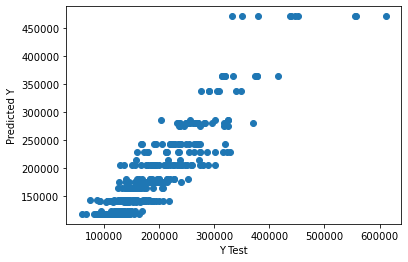

In [125]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

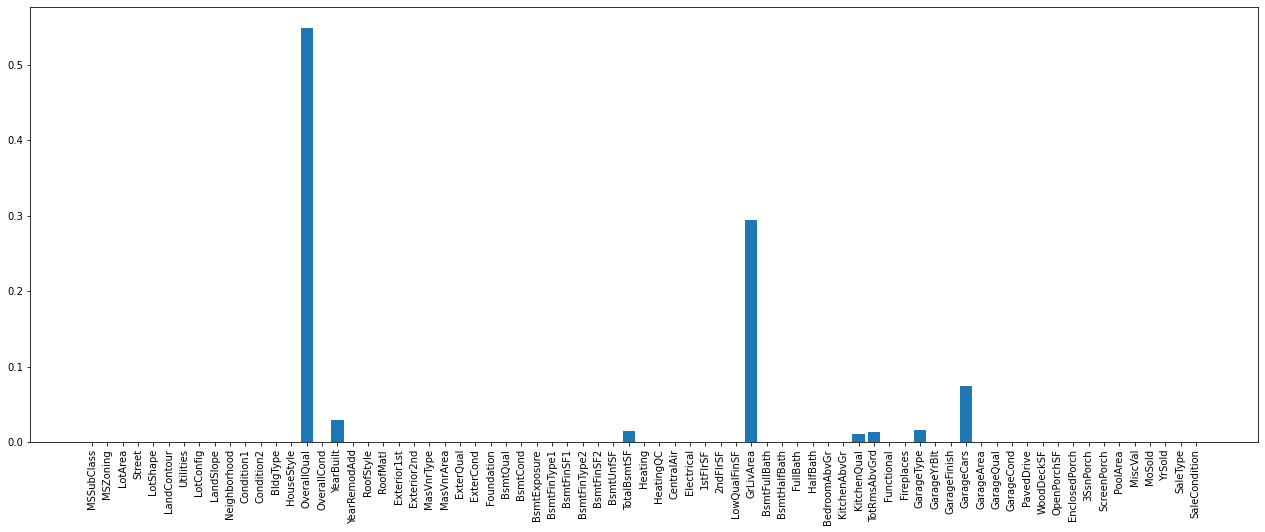

In [126]:
importance = cf.feature_importances_
pyplot.figure(figsize=(22,8))
pyplot.bar(X.columns, importance)
pyplot.xticks(X.columns, X.columns, rotation='vertical')
pyplot.show()

## Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [80, 100, 150]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]
#max_depth=[int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
max_depth=[2,3,4,5,6,7]
#min_samples_leaf=[int(x) for x in np.linspace(start = 2, stop = 100, num = 50)]
#max_leaf_nodes=[int(x) for x in np.linspace(start = 5, stop = 100, num = 20)]

RF_parameters = {'n_estimators': n_estimators,
                'criterion': ['mse', 'mae'],
                'max_depth': max_depth,
                'min_samples_split': min_samples_split}
               # 'min_samples_leaf': min_samples_leaf,
               # 'max_leaf_nodes': max_leaf_nodes}

cv_method = KFold(n_splits=2, shuffle=True, random_state=seed)

gs_RF = GridSearchCV(RandomForestRegressor(), 
                      param_grid=RF_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

RF_out=gs_RF.fit(X_train, y_train)
RF_out

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'n_estimators': [80, 100, 150]})

In [221]:
model_RF = RF_out.best_estimator_
model_RF.fit(X_train, y_train)
y_pred_train = model_RF.predict(X_train)
y_pred_test = model_RF.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Random Forest Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('Score train:', RF_out.score(X_train, y_train))
print('Score test:', RF_out.score(X_test, y_test))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_RF.best_params_

Random Forest Results:
MAE: 20965.94
MSE: 1090093388.07
RMSE: 33016.56
r2: 0.86
Score train: 0.9493105507465588
Score test: 0.8552632808749409




{'criterion': 'mse',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

Text(0, 0.5, 'Predicted Y')

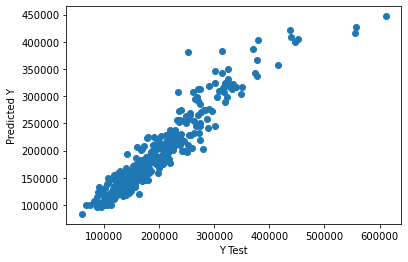

In [129]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

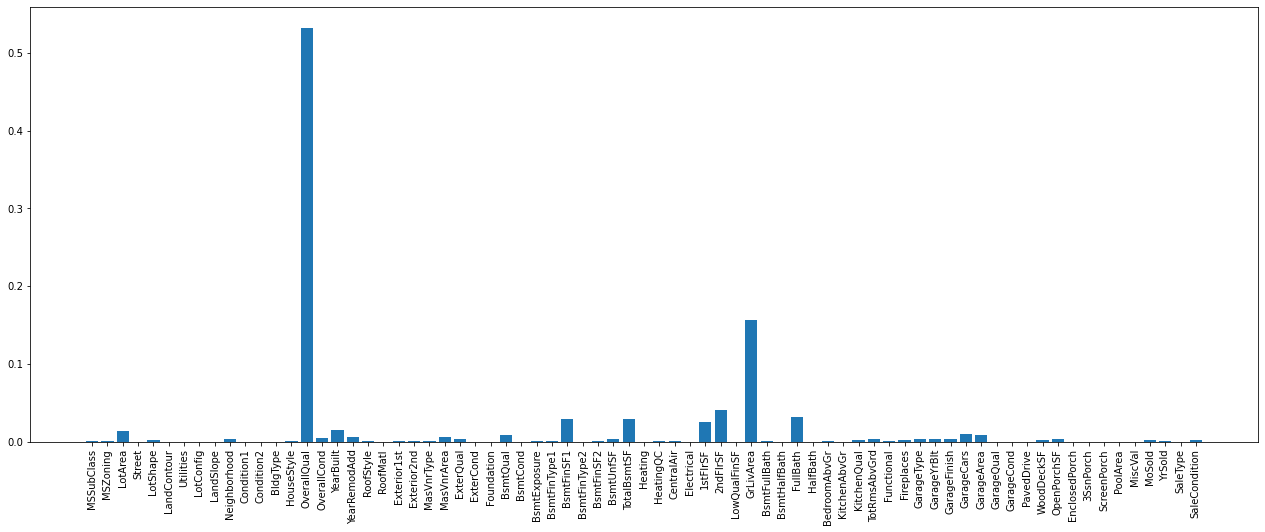

In [130]:
importance = cf.feature_importances_
pyplot.figure(figsize=(22,8))
pyplot.bar(X.columns, importance)
pyplot.xticks(X.columns, X.columns, rotation='vertical')
pyplot.show()

## XGBoost

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

XGB_parameters = {'booster': ['gbtree', 'gblinear'],
              'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, .05, .07],
              'max_depth':range(3,10,2),
              'min_child_weight':range(1,6,2),
              'gamma': [0.0, 0.1, 0.2],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 150, 200, 250, 300, 350, 400, 450, 500]}


cv_method = KFold(n_splits=10, shuffle=True, random_state=seed)

gs_XGB = GridSearchCV(XGBRegressor(), 
                      param_grid=XGB_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

XGB_out=gs_XGB.fit(X_train, y_train)
XGB_out


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'colsample_bytree': [0.7], 'gamma': [0.0, 0.1, 0.2],
                         'learnin

In [32]:
from sklearn import metrics

cf = XGB_out.best_estimator_
cf.fit(X_train, y_train)
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)
#Print the results of the fitting and hyperparameter optimization process
print('Random Forest Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('Score train:', XGB_out.score(X_train, y_train))
print('Score test:', XGB_out.score(X_test, y_test))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_XGB.best_params_

Random Forest Results:
MAE: 15743.86
MSE: 686501672.34
RMSE: 26201.18
r2: 0.88
Score train: 0.9930038792564134
Score test: 0.8779676154258672




{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

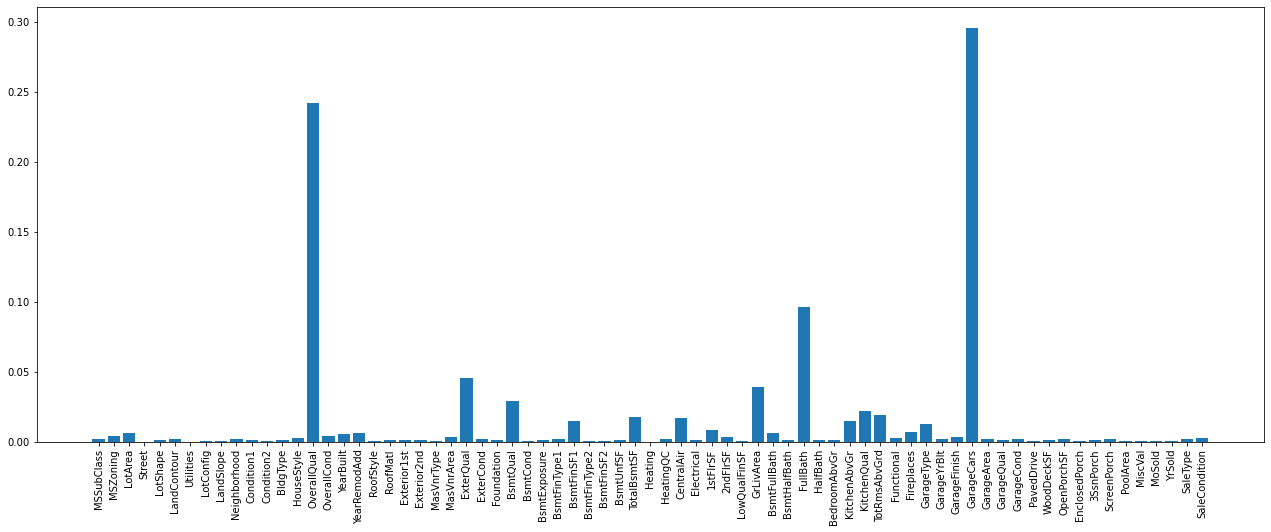

In [33]:
importance = cf.feature_importances_
pyplot.figure(figsize=(22,8))
pyplot.bar(X.columns, importance)
pyplot.xticks(X.columns, X.columns, rotation='vertical')
pyplot.show()

In [300]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [34]:
importance={'Feature': X.columns, 'F_Importance': importance}
importance

{'Feature': Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchS

In [35]:
importance=pd.DataFrame(importance)
importance=importance.sort_values(by=['F_Importance'], ascending=False, ignore_index=True)
importance.head(15)

,Feature,F_Importance
0,GarageCars,0.295750
1,OverallQual,0.241899
2,FullBath,0.096597
3,ExterQual,0.046081
4,GrLivArea,0.039115
5,BsmtQual,0.028978
6,KitchenQual,0.022162
7,TotRmsAbvGrd,0.019290
8,TotalBsmtSF,0.017888
9,CentralAir,0.017320


In [36]:
importance.F_Importance.sum()

1.0000001

Best accuracy was obtained by using XGBoost algorithm. Let's drop some features according to XGB feature importance analysis.

In [37]:
importance['Feature'][:11].T
#importance[:11]

0       GarageCars
1      OverallQual
2         FullBath
3        ExterQual
4        GrLivArea
5         BsmtQual
6      KitchenQual
7     TotRmsAbvGrd
8      TotalBsmtSF
9       CentralAir
10    KitchenAbvGr
Name: Feature, dtype: object

In [38]:
X_1=X[importance['Feature'][:11].T]

In [39]:
X_1.head(2)

,GarageCars,OverallQual,FullBath,ExterQual,GrLivArea,BsmtQual,KitchenQual,TotRmsAbvGrd,TotalBsmtSF,CentralAir,KitchenAbvGr
0,1,5,2,2,499,2,2,5,169,1,0
1,1,4,2,3,233,2,3,3,427,1,0


Let's recreate the train and test sets based on this new feature list

In [104]:
X_1.shape

(1335, 11)

In [106]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_1.values, y.values, test_size=0.3)

In [107]:
X_train.columns, X_test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [109]:
# And now let's re-train the model using XGB and the new feature selection
XGB_parameters = {'booster': ['gbtree', 'gblinear'],
              'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, .05, .07],
              'max_depth':range(3,10,2),
              'min_child_weight':range(1,6,2),
              'gamma': [0.0, 0.1, 0.2],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 150, 200, 250, 300, 350, 400, 450, 500]}


cv_method = KFold(n_splits=10, shuffle=True, random_state=seed)

gs_XGB = GridSearchCV(XGBRegressor(), 
                      param_grid=XGB_parameters, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      n_jobs=-1)

XGB_out=gs_XGB.fit(X_train, y_train)
XGB_out


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'colsample_bytree': [0.7], 'gamma': [0.0, 0.1, 0.2],
                         'learnin

In [111]:
model = XGB_out.best_estimator_   #cf
model.fit(X_train, y_train)       #cf
y_pred_train = model.predict(X_train)  #cf
y_pred_test = model.predict(X_test)    #cf
#Print the results of the fitting and hyperparameter optimization process
print('XGBRegressor Results:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test).round(2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)).round(2))
print('r2:', metrics.r2_score(y_test, y_pred_test).round(2))
print('Score train:', XGB_out.score(X_train, y_train))
print('Score test:', XGB_out.score(X_test, y_test))
print('\n')
#If you want to explore what the best parameters are for the given model with the given data,
#run the below command
gs_XGB.best_params_

XGBRegressor Results:
MAE: 21645.9
MSE: 989630584.29
RMSE: 31458.39
r2: 0.85
Score train: 0.9261083099957498
Score test: 0.8487673860843318




{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 250,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [112]:
import pickle

pickle.dump(model, open("model.dat", "wb"))
print("MODEL HAS BEEN SAVED SUCCESSFULLY")

MODEL HAS BEEN SAVED SUCCESSFULLY


In [126]:
prueba=X_train[44:45]
model.predict(prueba)

array([132265.53], dtype=float32)

In [127]:
X_1.columns

Index(['GarageCars', 'OverallQual', 'FullBath', 'ExterQual', 'GrLivArea',
       'BsmtQual', 'KitchenQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'CentralAir',
       'KitchenAbvGr'],
      dtype='object')

In [128]:
prueba

array([[  1,   4,   1,   3, 202,   2,   3,   3,  16,   1,   0]],
      dtype=int64)

In [119]:
feature_names=importance['Feature'][:11].T

In [120]:
data = {'Name':[feature_names], 'Values':[5, 2, 2, 2, 2, 699, 2, 686, 214, 1, 1]}

In [121]:
data

{'Name': [0       GarageCars
  1      OverallQual
  2         FullBath
  3        ExterQual
  4        GrLivArea
  5         BsmtQual
  6      KitchenQual
  7     TotRmsAbvGrd
  8      TotalBsmtSF
  9       CentralAir
  10    KitchenAbvGr
  Name: Feature, dtype: object],
 'Values': [5, 2, 2, 2, 2, 699, 2, 686, 214, 1, 1]}

In [53]:
import tkinter as tk
series = {'GarageCars': [0],
          'OverallQual': [2],
          'FullBath': [2],
          'ExterQual': [3],
          'GrLivArea': [77],
          'BsmtQual': [3],
          'KitchenQual': [3],
          'TotRmsAbvGrd': [2],
          'TotalBsmtSF': [58],
          'CentralAir': [1],
          'KitchenAbvGr': [0]
           }

vector = pd.DataFrame(series)

In [82]:
vector2=pd.DataFrame(
    {'GarageCars': [0],
          'OverallQual': [2],
          'FullBath': [2],
          'ExterQual': [3],
          'GrLivArea': [77],
          'BsmtQual': [3],
          'KitchenQual': [3],
          'TotRmsAbvGrd': [2],
          'TotalBsmtSF': [58],
          'CentralAir': [1],
          'KitchenAbvGr': [0]
           }
    )

In [84]:
vector2

,GarageCars,OverallQual,FullBath,ExterQual,GrLivArea,BsmtQual,KitchenQual,TotRmsAbvGrd,TotalBsmtSF,CentralAir,KitchenAbvGr
0,0,2,2,3,77,3,3,2,58,1,0


In [54]:
vector

,GarageCars,OverallQual,FullBath,ExterQual,GrLivArea,BsmtQual,KitchenQual,TotRmsAbvGrd,TotalBsmtSF,CentralAir,KitchenAbvGr
0,0,2,2,3,77,3,3,2,58,1,0


In [130]:
names = model.get_booster().feature_names
names

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']

In [122]:
result=model.predict(prueba)
result

array([143147.22, 209598.33, 305865.7 , 289203.5 ,  85259.86],
      dtype=float32)

In [79]:
test1=np.array([[0,2,2,3,77,3,3,2,58,1,0]])

In [94]:
X_1.head()

,GarageCars,OverallQual,FullBath,ExterQual,GrLivArea,BsmtQual,KitchenQual,TotRmsAbvGrd,TotalBsmtSF,CentralAir,KitchenAbvGr
0,1,5,2,2,499,2,2,5,169,1,0
1,1,4,2,3,233,2,3,3,427,1,0
2,1,5,2,2,537,2,2,3,204,1,0
3,2,5,1,3,504,3,2,4,107,1,0
4,2,6,2,2,700,2,2,6,357,1,0
